# Citation

Samaneh Mahdavifar, Amgad Hanafy Salem, Princy Victor, Miguel Garzon, Amir H. Razavi, Natasha Hellberg, Arash Habibi Lashkari, “Lightweight Hybrid Detection of Data Exfiltration using DNS based on Machine Learning”, The 11th IEEE International Conference on Communication and Network Security (ICCNS), Dec. 3-5, 2021, Beijing Jiaotong University, Weihai, China.

In [3]:
import re
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# 1. Load stateful DNS data

## 1.1. Load heavy stateful data

In [5]:
stateful_heavy_audio = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateful_features-heavy_audio.pcap.csv")
stateful_heavy_audio['Category'] = "Audio"
stateful_heavy_compressed = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateful_features-heavy_compressed.pcap.csv")
stateful_heavy_compressed['Category'] = "Compressed"
stateful_heavy_exe = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateful_features-heavy_exe.pcap.csv")
stateful_heavy_exe['Category'] = "Exe"
stateful_heavy_image = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateful_features-heavy_image.pcap.csv")
stateful_heavy_image['Category'] = "Image"
stateful_heavy_text = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateful_features-heavy_text.pcap.csv")
stateful_heavy_text['Category'] = "Text"
stateful_heavy_video = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Heavy/Attacks/stateful_features-heavy_video.pcap.csv")
stateful_heavy_video['Category'] = "Video"

stateful_heavy_benign = '../../../datasets/CICBELLEXFDNS2021/Heavy/Benign/'

# Use regex to get stateful benign data only
stateful_heavy_benign_list = [f"{stateful_heavy_benign}{f}" for f in listdir(stateful_heavy_benign) if isfile(join(stateful_heavy_benign, f)) and re.search("^stateful", f) != None]

stateful_heavy_benign_df = pd.concat(map(pd.read_csv, stateful_heavy_benign_list), ignore_index=True)
stateful_heavy_benign_df['Category'] = "Benign"
stateful_heavy_benign_df['Class'] = "Benign"

In [6]:
stateful_heavy_malicious = pd.concat(
    [
        stateful_heavy_audio,
        stateful_heavy_compressed,
        stateful_heavy_exe,
        stateful_heavy_image,
        stateful_heavy_text,
        stateful_heavy_video,
    ],
    axis=0,
    ignore_index=True
)

stateful_heavy_malicious['Class'] = 'Malicious'

In [7]:
stateful_heavy_data = pd.concat(
    [
        stateful_heavy_malicious,
        stateful_heavy_benign_df
    ],
    axis=0,
    ignore_index=True
)

stateful_heavy_data = stateful_heavy_data.sample(frac=1).reset_index(drop=True)

In [8]:
stateful_heavy_data

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,Category,Class
0,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Audio,Malicious
1,0.0,0,0,0,0,0,0,0,0,0,...,set(),set(),{},unknown,0,[1],1.0,0.0,Audio,Malicious
2,0.0,0,0,0,0,0,7,0,0,0,...,set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1, 1]",1.0,0.0,Audio,Malicious
3,0.0,0,0,0,0,0,1,0,0,0,...,set(),set(),{},unknown,0,[255],255.0,0.0,Audio,Malicious
4,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Audio,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141039,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Benign,Benign
141040,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Benign,Benign
141041,4.0,4,0,0,0,0,0,0,0,0,...,{'US'},{'AS16509'},{'13.235.222.29': {'bhaskarhindi.com'}},ec2-13-235-222-29.ap-south-1.compute.amazonaws...,0,"[128, 128, 122, 122]",125.0,9.0,Benign,Benign
141042,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Benign,Benign


## 1.2. Load light stateful data

In [10]:
stateful_light_audio = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateful_features-light_audio.pcap.csv")
stateful_light_audio['Category'] = "Audio"
stateful_light_compressed = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateful_features-light_compressed.pcap.csv")
stateful_light_compressed['Category'] = "Compressed"
stateful_light_exe = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateful_features-light_exe.pcap.csv")
stateful_light_exe['Category'] = "Exe"
stateful_light_image = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateful_features-light_image.pcap.csv")
stateful_light_image['Category'] = "Image"
stateful_light_text = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateful_features-light_text.pcap.csv")
stateful_light_text['Category'] = "Text"
stateful_light_video = pd.read_csv("../../../datasets/CICBELLEXFDNS2021/Light/Attacks/stateful_features-light_video.pcap.csv")
stateful_light_video['Category'] = "Video"

stateful_light_benign = '../../../datasets/CICBELLEXFDNS2021/Light/Benign/'

# Use regex to get stateful benign data only
stateful_light_benign_list = [f"{stateful_light_benign}{f}" for f in listdir(stateful_light_benign) if isfile(join(stateful_light_benign, f)) and re.search("^stateful", f) != None]

stateful_light_benign_df = pd.concat(map(pd.read_csv, stateful_light_benign_list), ignore_index=True)
stateful_light_benign_df['Category'] = "Benign"
stateful_light_benign_df['Class'] = "Benign"

In [11]:
stateful_light_malicious = pd.concat(
    [
        stateful_light_audio,
        stateful_light_compressed,
        stateful_light_exe,
        stateful_light_image,
        stateful_light_text,
        stateful_light_video,
    ],
    axis=0,
    ignore_index=True
)

stateful_light_malicious['Class'] = 'Malicious'

In [12]:
stateful_light_data = pd.concat(
    [
        stateful_light_malicious,
        stateful_light_benign_df
    ],
    axis=0,
    ignore_index=True
)

stateful_light_data = stateful_light_data.sample(frac=1).reset_index(drop=True)

In [13]:
stateful_light_data

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,Category,Class
0,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Benign,Benign
1,2.0,2,0,0,0,0,0,0,0,0,...,{'US'},{'AS13335'},{'172.64.89.34': {'tugaflix.me'}},unknown,0,"[128, 122]",125.0,9.0,Benign,Benign
2,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Audio,Malicious
3,1.0,1,0,0,0,0,0,0,0,0,...,set(),set(),{},unknown,0,[128],128.0,0.0,Benign,Benign
4,4.0,4,0,0,0,0,0,0,0,0,...,{'RU'},{'AS31200'},{'5.128.183.238': {'demography.site'}},l5-128-183-238.novotelecom.ru,0,"[128, 128, 122, 122]",125.0,9.0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34058,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Compressed,Malicious
34059,1.0,1,0,0,0,0,0,0,0,0,...,set(),set(),{},unknown,0,[128],128.0,0.0,Benign,Benign
34060,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Exe,Malicious
34061,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Benign,Benign


## 1.3. Combine light and heavy stateful data

In [15]:
stateful_data = pd.concat(
    [
        stateful_heavy_data,
        stateful_light_data
    ],
    axis=0,
    ignore_index=True
)

stateful_data = stateful_data.sample(frac=1).reset_index(drop=True)

In [16]:
stateful_data

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,Category,Class
0,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Image,Malicious
1,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Audio,Malicious
2,0.0,0,0,0,0,0,8,0,0,0,...,set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1, 1, 1]",1.0,0.0,Benign,Benign
3,1.0,1,0,0,0,0,0,0,0,0,...,set(),set(),{},unknown,0,[128],128.0,0.0,Benign,Benign
4,0.0,0,0,0,0,0,4,0,0,0,...,set(),set(),{},unknown,0,"[1, 1, 1, 1]",1.0,0.0,Benign,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175102,1.0,1,0,0,0,0,0,0,0,0,...,set(),set(),{},unknown,0,[128],128.0,0.0,Benign,Benign
175103,0.0,0,0,0,0,0,1,0,0,0,...,set(),set(),{},unknown,0,[255],255.0,0.0,Text,Malicious
175104,0.0,0,0,0,0,0,6,0,0,0,...,set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1]",1.0,0.0,Image,Malicious
175105,4.0,4,0,0,0,0,0,0,0,0,...,{'HR'},{'AS48256'},{'91.223.29.228': {'crosig.hr'}},pametnekarijere-test.crosig.hr,0,"[128, 128, 122, 122]",125.0,9.0,Benign,Benign


# 2. Exploratory Data Analysis (EDA)

In [17]:
stateful_data.head()

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance,Category,Class
0,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Image,Malicious
1,0.0,0,0,0,0,0,2,0,0,0,...,set(),set(),{},unknown,0,"[1, 1]",1.0,0.0,Audio,Malicious
2,0.0,0,0,0,0,0,8,0,0,0,...,set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1, 1, 1]",1.0,0.0,Benign,Benign
3,1.0,1,0,0,0,0,0,0,0,0,...,set(),set(),{},unknown,0,[128],128.0,0.0,Benign,Benign
4,0.0,0,0,0,0,0,4,0,0,0,...,set(),set(),{},unknown,0,"[1, 1, 1, 1]",1.0,0.0,Benign,Benign


In [18]:
stateful_data.columns

Index(['rr', 'A_frequency', 'NS_frequency', 'CNAME_frequency', 'SOA_frequency',
       'NULL_frequency', 'PTR_frequency', 'HINFO_frequency', 'MX_frequency',
       'TXT_frequency', 'AAAA_frequency', 'SRV_frequency', 'OPT_frequency',
       'rr_type', 'rr_count', 'rr_name_entropy', 'rr_name_length',
       'distinct_ns', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'a_records', 'unique_ttl',
       'ttl_mean', 'ttl_variance', 'Category', 'Class'],
      dtype='object')

In [19]:
stateful_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175107 entries, 0 to 175106
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rr                175107 non-null  float64
 1   A_frequency       175107 non-null  int64  
 2   NS_frequency      175107 non-null  int64  
 3   CNAME_frequency   175107 non-null  int64  
 4   SOA_frequency     175107 non-null  int64  
 5   NULL_frequency    175107 non-null  int64  
 6   PTR_frequency     175107 non-null  int64  
 7   HINFO_frequency   175107 non-null  int64  
 8   MX_frequency      175107 non-null  int64  
 9   TXT_frequency     175107 non-null  int64  
 10  AAAA_frequency    175107 non-null  int64  
 11  SRV_frequency     175107 non-null  int64  
 12  OPT_frequency     175107 non-null  int64  
 13  rr_type           175107 non-null  object 
 14  rr_count          175107 non-null  int64  
 15  rr_name_entropy   175107 non-null  float64
 16  rr_name_length    17

Show unique DNS exfiltration categories and their respective counts

In [20]:
stateful_data['Category'].value_counts()

Category
Benign        91784
Text          19837
Audio         14981
Compressed    13328
Video         12142
Exe           11816
Image         11219
Name: count, dtype: int64

Show unique DNS exfiltration classes and their respective counts

In [21]:
stateful_data['Class'].value_counts()

Class
Benign       91784
Malicious    83323
Name: count, dtype: int64

Check for NaN values

In [22]:
stateful_data.isna().any()

rr                  False
A_frequency         False
NS_frequency        False
CNAME_frequency     False
SOA_frequency       False
NULL_frequency      False
PTR_frequency       False
HINFO_frequency     False
MX_frequency        False
TXT_frequency       False
AAAA_frequency      False
SRV_frequency       False
OPT_frequency       False
rr_type             False
rr_count            False
rr_name_entropy     False
rr_name_length      False
distinct_ns         False
distinct_ip         False
unique_country      False
unique_asn          False
distinct_domains    False
reverse_dns         False
a_records           False
unique_ttl          False
ttl_mean            False
ttl_variance        False
Category            False
Class               False
dtype: bool

Show NaN value counts for each column

In [23]:
stateful_data.isna().sum()

rr                  0
A_frequency         0
NS_frequency        0
CNAME_frequency     0
SOA_frequency       0
NULL_frequency      0
PTR_frequency       0
HINFO_frequency     0
MX_frequency        0
TXT_frequency       0
AAAA_frequency      0
SRV_frequency       0
OPT_frequency       0
rr_type             0
rr_count            0
rr_name_entropy     0
rr_name_length      0
distinct_ns         0
distinct_ip         0
unique_country      0
unique_asn          0
distinct_domains    0
reverse_dns         0
a_records           0
unique_ttl          0
ttl_mean            0
ttl_variance        0
Category            0
Class               0
dtype: int64

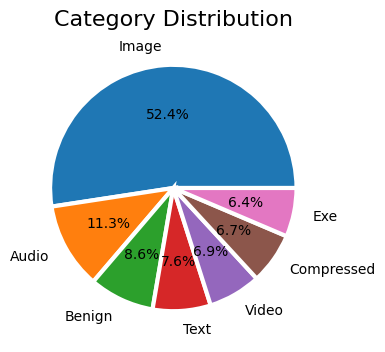

In [24]:
labels = stateful_data['Category'].unique()
values = stateful_data['Category'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.title("Category Distribution", size=16)
plt.show()

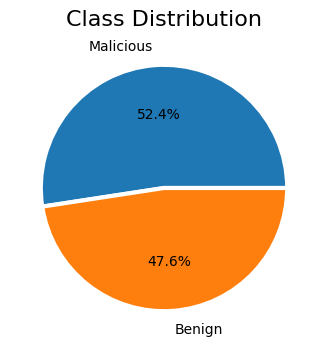

In [25]:
labels = stateful_data['Class'].unique()
values = stateful_data['Class'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(values, labels=labels, labeldistance=1.15, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct='%1.1f%%')
plt.title("Class Distribution", size=16)
plt.show()

# 3. Data preparation

1. Separate features from labels
2. Remove timestamps to prevent ML overfitting
3. Use target encoding for categorical columns
4. Encode labels
5. (Optional) Normalize data using [StandardScaler](https://www.geeksforgeeks.org/machine-learning/what-is-standardization-in-machine-learning/)

## 3.1. Separate features from labels

In [26]:
X_stateful_data = stateful_data.drop(['Class'], axis=1)
y_stateful_data = stateful_data['Class']

## 3.2. Remove timestamps to prevent ML overfiting

In [27]:
X_stateful_data.drop(['Category'], axis=1, inplace=True)

In [28]:
X_stateful_data.head()

,rr,A_frequency,NS_frequency,CNAME_frequency,SOA_frequency,NULL_frequency,PTR_frequency,HINFO_frequency,MX_frequency,TXT_frequency,...,distinct_ns,distinct_ip,unique_country,unique_asn,distinct_domains,reverse_dns,a_records,unique_ttl,ttl_mean,ttl_variance
0,0.0,0,0,0,0,0,2,0,0,0,...,0,set(),set(),set(),{},unknown,0,"[1, 1]",1.0,0.0
1,0.0,0,0,0,0,0,2,0,0,0,...,0,set(),set(),set(),{},unknown,0,"[1, 1]",1.0,0.0
2,0.0,0,0,0,0,0,8,0,0,0,...,0,set(),set(),set(),{},unknown,0,"[1, 1, 1, 1, 1, 1, 1, 1]",1.0,0.0
3,1.0,1,0,0,0,0,0,0,0,0,...,0,set(),set(),set(),{},unknown,0,[128],128.0,0.0
4,0.0,0,0,0,0,0,4,0,0,0,...,0,set(),set(),set(),{},unknown,0,"[1, 1, 1, 1]",1.0,0.0


## 3.3. Target encoding categorical columns

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder

Check unique value count in categorical columns in feature data

In [30]:
categorical_columns = X_stateful_data.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Column: {column}, unique values: {len(X_stateful_data[column].unique())}")

Column: rr_type, unique values: 6
Column: distinct_ip, unique values: 1
Column: unique_country, unique values: 138
Column: unique_asn, unique values: 3326
Column: distinct_domains, unique values: 28598
Column: reverse_dns, unique values: 12505
Column: unique_ttl, unique values: 76


Target encode categorical columns

In [31]:
encoder = TargetEncoder(
    categories='auto',
    target_type='binary',  # Categorize between Benign and Malicious
    smooth='auto',
    cv=5,
    random_state=42
)

In [32]:
categorical_columns = X_stateful_data.select_dtypes(include='object').columns
categorical_columns

Index(['rr_type', 'distinct_ip', 'unique_country', 'unique_asn',
       'distinct_domains', 'reverse_dns', 'unique_ttl'],
      dtype='object')

In [33]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_stateful_data, y_stateful_data, test_size=0.2, random_state=42)

In [34]:
%%time

X_train[categorical_columns] = encoder.fit_transform(X_train[categorical_columns], y_train)

CPU times: user 952 ms, sys: 249 μs, total: 952 ms
Wall time: 985 ms


In [35]:
%%time

X_test[categorical_columns] = encoder.transform(X_test[categorical_columns])

CPU times: user 253 ms, sys: 1.03 ms, total: 255 ms
Wall time: 282 ms


## 3.4. Encode labels

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

Get shapes of train and test data subsets

In [38]:
X_train.shape, y_train.shape

((140085, 27), (140085,))

In [39]:
X_test.shape, y_test.shape

((35022, 27), (35022,))

## 3.5. Normalize data

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 4. Model training

XGBoost will be trained and tested on heavy stateless data

## 4.1. Training

In [44]:
%%time

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

CPU times: user 4.53 s, sys: 108 ms, total: 4.64 s
Wall time: 858 ms


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## 4.2. Testing

In [45]:
%%time

y_pred = model.predict(X_test)

CPU times: user 190 ms, sys: 3.66 ms, total: 194 ms
Wall time: 50 ms


In [46]:
from sklearn.metrics import accuracy_score, root_mean_squared_error, mean_squared_error, mean_absolute_error, precision_score, confusion_matrix, multilabel_confusion_matrix, classification_report, f1_score, precision_score, recall_score

In [52]:
results_dict = {}

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1 = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) 
rmse = root_mean_squared_error(y_true=y_test,y_pred=y_pred)

results = [accuracy, precision, f1, recall, mae, mse, rmse]
results_dict["XGB_stateful"] = results

pd.DataFrame.from_dict(results_dict, orient="index", columns=["Accuracy", "Precision", "F1", "Recall", "MAE", "MSE", "RMSE"])

,Accuracy,Precision,F1,Recall,MAE,MSE,RMSE
XGB_stateful,0.815573,0.830736,0.814599,0.815573,0.184427,0.184427,0.42945


# 5. Hyperparameter tuning

XGBoost hyperparameter tuning using optuna

In [48]:
pass

# 6. Save model

In [50]:
import pickle

In [51]:
dir = '../../../models/CIC_BELL_EXF_DNS_2021/stateful/'

with open(f'{dir}XGB_stateful.pkl', 'wb') as f:
    pickle.dump(model, f)